In [ ]:
# for google colab
from google.colab import drive
# mount your Google Drive
drive.mount('/content/gdrive')

In [ ]:
# for google colab
# copy all files from "AI_HW1" directory in Google drive to current directory
!cp -r ./gdrive/MyDrive/AI_HW1/* .

In [1]:
import dataset
import adaboost
import utils
import detection
import matplotlib.pyplot as plt

### Part 1
Implement loadImages function in dataset.py and test the following code

Loading images
The number of training samples loaded: 200
The number of test samples loaded: 200
Show the first and last images of training dataset


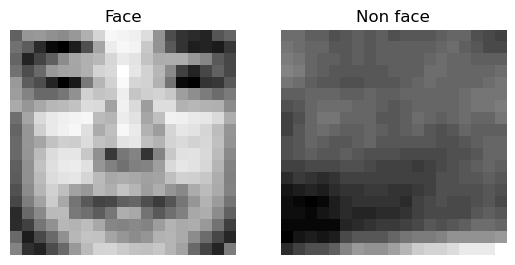

In [2]:
print('Loading images')
trainData = dataset.loadImages('data/train')
print(f'The number of training samples loaded: {len(trainData)}')
testData = dataset.loadImages('data/test')
print(f'The number of test samples loaded: {len(testData)}')

print('Show the first and last images of training dataset')
fig, ax = plt.subplots(1, 2)
ax[0].axis('off')
ax[0].set_title('Face')
ax[0].imshow(trainData[1][0], cmap='gray')
ax[1].axis('off')
ax[1].set_title('Non face')
ax[1].imshow(trainData[-1][0], cmap='gray')
plt.show()

### Part 2
Implement selectBest function in adaboost.py and test the following code.

In [3]:
print('Start training your classifier')
clf = adaboost.Adaboost(T=1)
clf.train(trainData)

print('\nEvaluate your classifier with training dataset')
utils.evaluate(clf, trainData)

print('\nEvaluate your classifier with test dataset')
utils.evaluate(clf, testData)

Start training your classifier
Computing integral images
Building features
Applying features to dataset
Selecting best features
Selected 5171 potential features
Initialize weights
Run No. of Iteration: 1
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(8, 0, 1, 3), RectangleRegion(7, 3, 1, 3)], negative regions=[RectangleRegion(7, 0, 1, 3), RectangleRegion(8, 3, 1, 3)]) with accuracy: 162.000000 and alpha: 1.450010

Evaluate your classifier with training dataset
False Positive Rate: 28/100 (0.280000)
False Negative Rate: 10/100 (0.100000)
Accuracy: 162/200 (0.810000)

Evaluate your classifier with test dataset
False Positive Rate: 49/100 (0.490000)
False Negative Rate: 55/100 (0.550000)
Accuracy: 96/200 (0.480000)


0.48

### Part 3
Modify difference values at parameter T of the Adaboost algorithm at Part 2. And find better results. Please test value 1~10 at least.

In [ ]:
clfs = []
best_test_i = 0
train_accs = []
test_accs = []
for i in range(1,11):
    print("--------------")
    print('Training on classifier', i)
    clf_ = adaboost.Adaboost(T=i)
    clf_.train(trainData)

    print('\nEvaluate your classifier with training dataset')
    train_acc = utils.evaluate(clf_, trainData)
    train_accs.append(train_acc)

    print('\nEvaluate your classifier with test dataset')
    test_acc = utils.evaluate(clf_, testData)
    test_accs.append(test_acc)
    clfs.append(clf_)
    print("--------------")
    if test_acc > test_accs[best_test_i]:
        best_test_i = i-1

clf = clfs[best_test_i]

--------------
Training on classifier 1
Computing integral images
Building features
Applying features to dataset
Selecting best features
Selected 5171 potential features
Initialize weights
Run No. of Iteration: 1
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(8, 0, 1, 3), RectangleRegion(7, 3, 1, 3)], negative regions=[RectangleRegion(7, 0, 1, 3), RectangleRegion(8, 3, 1, 3)]) with accuracy: 162.000000 and alpha: 1.450010

Evaluate your classifier with training dataset
False Positive Rate: 28/100 (0.280000)
False Negative Rate: 10/100 (0.100000)
Accuracy: 162/200 (0.810000)

Evaluate your classifier with test dataset
False Positive Rate: 49/100 (0.490000)
False Negative Rate: 55/100 (0.550000)
Accuracy: 96/200 (0.480000)
--------------
--------------
Training on classifier 2
Computing integral images
Building features
Applying features to dataset
Selecting best features
Selected 5171 potential features
Initialize weights
Run No. of 

Applying features to dataset
Selecting best features
Selected 5171 potential features
Initialize weights
Run No. of Iteration: 1
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(8, 0, 1, 3), RectangleRegion(7, 3, 1, 3)], negative regions=[RectangleRegion(7, 0, 1, 3), RectangleRegion(8, 3, 1, 3)]) with accuracy: 162.000000 and alpha: 1.450010
Run No. of Iteration: 2
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(4, 8, 2, 9)], negative regions=[RectangleRegion(2, 8, 2, 9)]) with accuracy: 156.000000 and alpha: 1.286922
Run No. of Iteration: 3
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(16, 16, 1, 2)], negative regions=[RectangleRegion(15, 16, 1, 2)]) with accuracy: 155.000000 and alpha: 1.011738
Run No. of Iteration: 4
Chose classifier: Weak Clf (threshold=0, polarity=1, Haar feature (positive regions=[RectangleRegion(4, 14, 8,

In [ ]:
print(train_accs)
print(test_accs)

In [ ]:
print('When T = {}, the adaboost works best'.format(best_test_i+1))
T = range(1, 11)
plt.plot(T, train_accs, 'bo-', label='Training Accuracy')
plt.plot(T, test_accs, 'rs-', label='Test Accuracy')
plt.xlabel('T')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend(loc='lower right')
plt.show()

### Part 4
Implement detect function in detection.py and test the following code.

In [ ]:
print('Detect faces at the assigned lacation using your classifier')
img = detection.detect('data/detect/detectData.txt', clf)

### Part 5
Test classifier on your own images


In [ ]:
print('\nDetect faces on your own images')
detection.detect_selfdata('data/Self_made_detect/coord.txt', clf)

In [9]:
# for google colab
# REMEMBER to execute this line once you've modified any .py code!
# Save the .py code you have modified to your Google Drive
!cp ./*.py ./gdrive/MyDrive/AI_HW1/

cp: ./gdrive/MyDrive/AI_HW1 is not a directory
